# Relevant Libraries

In [1]:
import pandas as pd                     ##pandas for data manipulation
import numpy as np                      ##numerical python
import matplotlib.pyplot as plt         ##data visualization
import seaborn as sns                   ##data visualization
sns.set()

# Importing Dataset and Basic Data Manipulation

In [149]:
dataset=pd.read_csv("appdata10.csv")    ##importing dataset
dataset.head()     ##viewing the first five records of dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [150]:
dataset["hour"]=dataset["hour"].str.slice(1,3).astype(int)  ##converting the format of field "hour"

In [151]:
dataset.describe()    ##for descriptive statistics

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
dataset.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [153]:
dataset.isnull().sum()      ##checking the number of null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [154]:
dataset.dtypes.value_counts()        ##the number of diiferent datatypes

int64     8
object    3
int32     1
dtype: int64

In [155]:
dataset.duplicated(keep=False).count()  ##checking for presence of duplicate values

50000

In [156]:
dataset.shape                           ##displays number of records * fields

(50000, 12)

# Exploratory Data Analysis

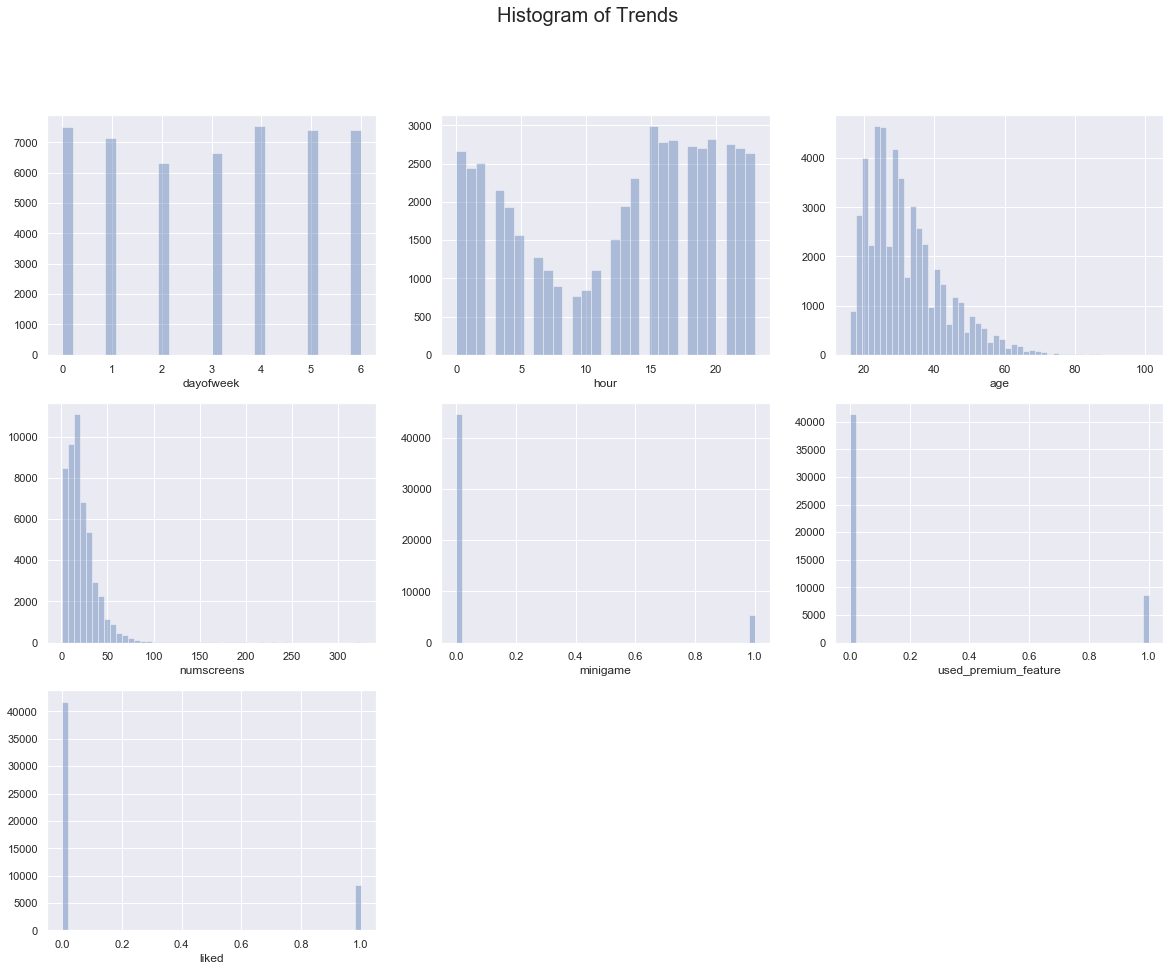

In [157]:
list_of_features=['dayofweek', 'hour', 'age',
       'numscreens', 'minigame', 'used_premium_feature',"liked"]
fig = plt.figure(figsize=(20,15))                     ##setting size of figure
plt.suptitle('Histogram of Trends', fontsize=20)      
for (i,feature) in enumerate(list_of_features):     ##creating the subplots
    subplot=fig.add_subplot(3,3,i+1)
    
    sns.distplot(dataset[feature],kde=False)
    

In [158]:
correlation_of_independent_variables_with_dependent_variable=dataset[list_of_features].corrwith(dataset["enrolled"])
correlation_of_independent_variables_with_dependent_variable


dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
liked                  -0.007022
dtype: float64

Correlation is used to find out the degree of inter-relation between two variables

It ranges from -1 to 1

A correlation of 0 represent that two variables are independent of one other.

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

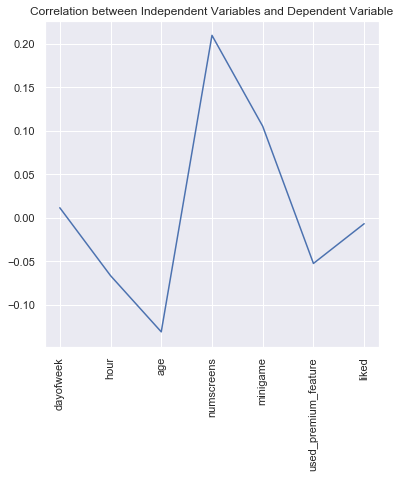

In [159]:
plt.figure(figsize=(6,6))     ## figure size
plt.plot(correlation_of_independent_variables_with_dependent_variable)   ##line plot
plt.grid(True)
plt.title("Correlation between Independent Variables and Dependent Variable")
plt.xticks(rotation=90)   ##to prevent labels from overlapping

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

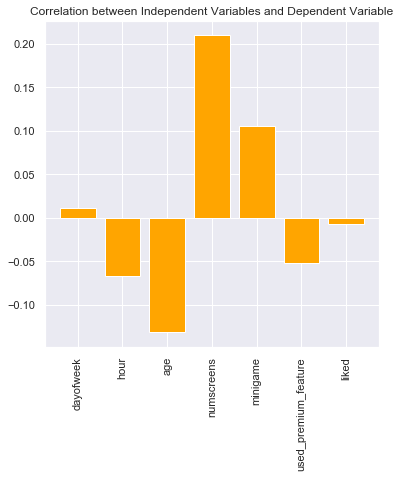

In [160]:
plt.figure(figsize=(6,6))
plt.bar(list_of_features,correlation_of_independent_variables_with_dependent_variable,color="Orange")
plt.grid(True)
plt.title("Correlation between Independent Variables and Dependent Variable")
plt.xticks(rotation=90)      ##to prevent labels from overlapping

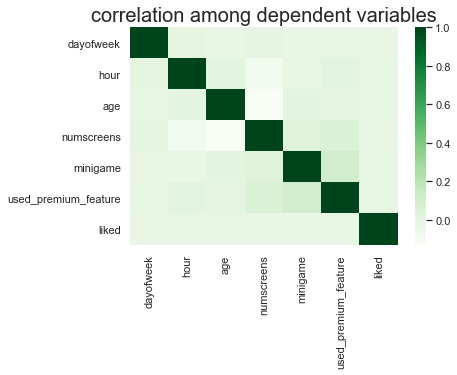

In [161]:
correlation_among_dependent_variables=dataset[list_of_features].corr()
correlation_among_dependent_variables
plt.figure(figsize=(6,4))
sns.heatmap(correlation_among_dependent_variables,cmap="Greens")
plt.title("correlation among dependent variables",size=20)
plt.show()

# Feature Engineering 

# Fine Tuning Response

In [162]:
import datetime as dt

In [163]:
dataset["first_open"]=pd.to_datetime(dataset["first_open"])   ##convert data to datetime type
dataset["enrolled_date"]=pd.to_datetime(dataset["enrolled_date"])  ##convert data to datetime type
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

Text(0.5, 1.0, 'Hour Difference between Enrollement and First Opening in All Time')

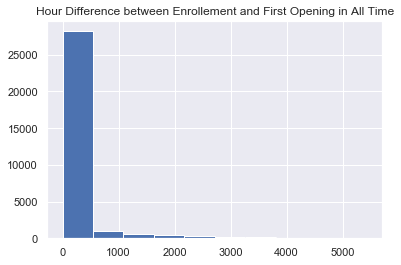

In [164]:
dataset["difference"]=(dataset["enrolled_date"]-dataset["first_open"]).astype("timedelta64[h]") ##difference in hours
plt.hist(dataset["difference"].dropna(axis=0))
plt.title("Hour Difference between Enrollement and First Opening in All Time")

Text(0.5, 1.0, 'Hour Difference between Enrollement and First Opening in first Two days')

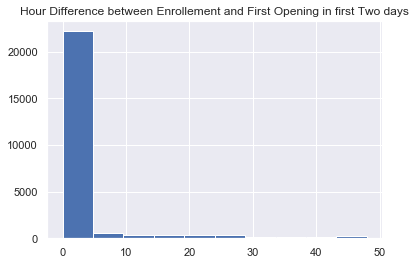

In [165]:
dataset["difference"]=(dataset["enrolled_date"]-dataset["first_open"]).astype("timedelta64[h]")
plt.hist(dataset["difference"].dropna(axis=0),range=[0,48])
plt.title("Hour Difference between Enrollement and First Opening in first Two days")

In [166]:
dataset.loc[dataset["difference"]>48,"enrolled"]=0  ##considering enrollment to be invalid data to consider post 48th hour of sign up
dataset=dataset.drop(columns=["enrolled_date","first_open","difference"])  ##removing the specified columns
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


# Dealing with the Screen List

In [167]:
top_screens = pd.read_csv('top_screens.csv',usecols=["top_screens"],squeeze=True) ##series output
top_screens=top_screens.tolist()   ##converting to list

In [168]:
dataset["screen_list"] = dataset["screen_list"].astype(str) + ','  ##making the number of screens equal to number of commas

for sc in top_screens:  ##iterating over the top screens 
    dataset[sc] = dataset["screen_list"].str.contains(sc).astype(int)   ##adding a column for each top sreen with value 0 or 1
    dataset['screen_list'] = dataset["screen_list"].str.replace(sc+",", "") ##removing the screens which  are top screens

dataset['Other'] = dataset["screen_list"].str.count(",")   ##number of non top screens
dataset = dataset.drop(columns=['screen_list'])   ##removing the screen_list column
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


# Building A Model

In [169]:
y=dataset["enrolled"]  ##dependent variable(to be predicted)
x=dataset.drop(columns=["enrolled","user"])   ##independen variables(predictor)


In [170]:
from sklearn.model_selection import train_test_split                  ##dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,  ##80-20 split
                                                    random_state = 5)

In [171]:
from sklearn.preprocessing import StandardScaler      ##for scaling data 
sc=StandardScaler()                                   ## sc is object of class StandardScaler
x_train=sc.fit_transform(x_train)                    ##scaling is done considering mean and deviation of data in training set
x_test=sc.transform(x_test)                          ##only transform is used to prevent information leakage 

In [172]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)  ##logistic regression model
classifier.fit(x_train,y_train)        ##fitting the model on training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluating Model

In [173]:
y_predicted=classifier.predict(x_test)     ##predicting on test data set
y_predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [189]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_predicted)                 
df=pd.DataFrame(confusion_matrix(y_test,y_predicted))  
df.columns=["Predicted 0","Predicted 1"]
df.index=["Actual 0","Actual 1"]
df

,Predicted 0,Predicted 1
Actual 0,4021,1077
Actual 1,1137,3765


Type 1 error -Model predicts  1 (yes) and reality is no

Type 2 error- Model predicts 0 (no) and reality is yes

In [178]:
accuracy_score(y_test,y_predicted)

0.7786

# K-Fold Cross Validation

# Model Testing and Boosting

In [179]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= x_train, y = y_train, cv = 10) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.26 %
Standard Deviation: 0.90 %


# GridSearch

In [180]:
from sklearn.model_selection import GridSearchCV

parameters=[{"penalty":["l1", "l2", "elasticnet", "none"] ,    ##parameters of model 
             'C': [0.25, 0.5, 0.75, 1],                        ##refer to sklearn api 
            "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}]

            
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 77.26 %
Best Parameters: {'C': 0.75, 'penalty': 'l1', 'solver': 'saga'}


In [182]:
classifier_tuned = LogisticRegression(random_state = 0,C=0.75,penalty="l1",solver="saga")  ##hypertuning
classifier_tuned.fit(x_train, y_train)

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
accuracy_score(y_test,classifier_tuned.predict(x_test))

0.7787